In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [5]:
# load the MOM6 data
db='/g/data/ik11/outputs/mom6-panan/panant.db' 
session=cc.database.create_session(db)
expts = ['panant-v2','panant-hycom1','panant-v3','panant-hycom1-v2','panant-01-zstar']

In [6]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/41597/status,
Dashboard: /proxy/41597/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34943,Workers: 4
Dashboard: /proxy/41597/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://10.0.128.134:35495,Total threads: 4
Dashboard: /proxy/44551/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:42243,


In [37]:
# get the depth
depth = cc.querying.getvar('panant-v2','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/backends/plugins.py:119: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-pa

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'pydap', 'rasterio', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [8]:
#1-year stream function
flux4 = cc.querying.getvar('panant-v2','umo_2d', session,chunks={'xh':120,'yh':120})
flux4 = flux4.isel(time=slice(2555,2920)) # slice to the same time range as MOM6
flux4_mean = flux4.mean('time').load().sum('yh')/1e9

distributed.worker - WARNING - Compute Failed
Function:  execute_task
args:      ((<function apply at 0x7f3ef09ecd30>, <function open_dataset at 0x7f3ea81f8ca0>, ['/g/data4/ik11/outputs/mom6-panan/panant-v2/output017/19920601.ocean_month.nc'], (<class 'dict'>, [['engine', None], ['chunks', (<class 'dict'>, [['xh', 120], ['yh', 120]])]])))
kwargs:    {}
Exception: ValueError("did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'pydap', 'rasterio', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:\nhttp://xarray.pydata.org/en/stable/getting-started-guide/installing.html\nhttp://xarray.pydata.org/en/stable/user-guide/io.html")

distributed.worker - WARNING - Compute Failed
Function:  execute_task
args:      ((<function apply at 0x7f3ef09ecd30>, <function open_dataset at 0x7f3ea81f8ca0>, ['/g/data4/ik11/outputs/mom6-panan/panant-v2/ou

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'pydap', 'rasterio', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site

In [6]:
flux4_mean

<xarray.DataArray 'umo_2d' (xq: 7201)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * xq       (xq) float64 -280.0 -279.9 -279.9 -279.8 ... 79.85 79.9 79.95 80.0

In [9]:
session_2 = cc.database.create_session()

In [11]:
#SSH variable in ACCESS-OM2 models
variable = 'eta_t'

# dates to match the AVISO record
start_time = '1998-01-01'
end_time = '1998-12-31'

In [34]:
#stream function
expt_1 = '1deg_jra55v13_iaf_spinup1_B1' 
flux1 = cc.querying.getvar(expt_1,'tx_trans_int_z', session_2, start_time=start_time, end_time=end_time)
flux1 = flux1.sel(time=slice(start_time, end_time)) # slice to the same time range as MOM6
flux1_mean = flux1.mean('time').cumsum('yt_ocean')/1e9
flux1_mean_1 = (flux1_mean - flux1_mean.sel(xu_ocean=-101,method='nearest').sel(yt_ocean=-50,method='nearest')).load()


In [35]:
depth = cc.querying.getvar(expt_1,'deptho',session_2,n=1)

VariableNotFoundError: No files were found containing 'deptho' in the '1deg_jra55v13_iaf_spinup1_B1' experiment

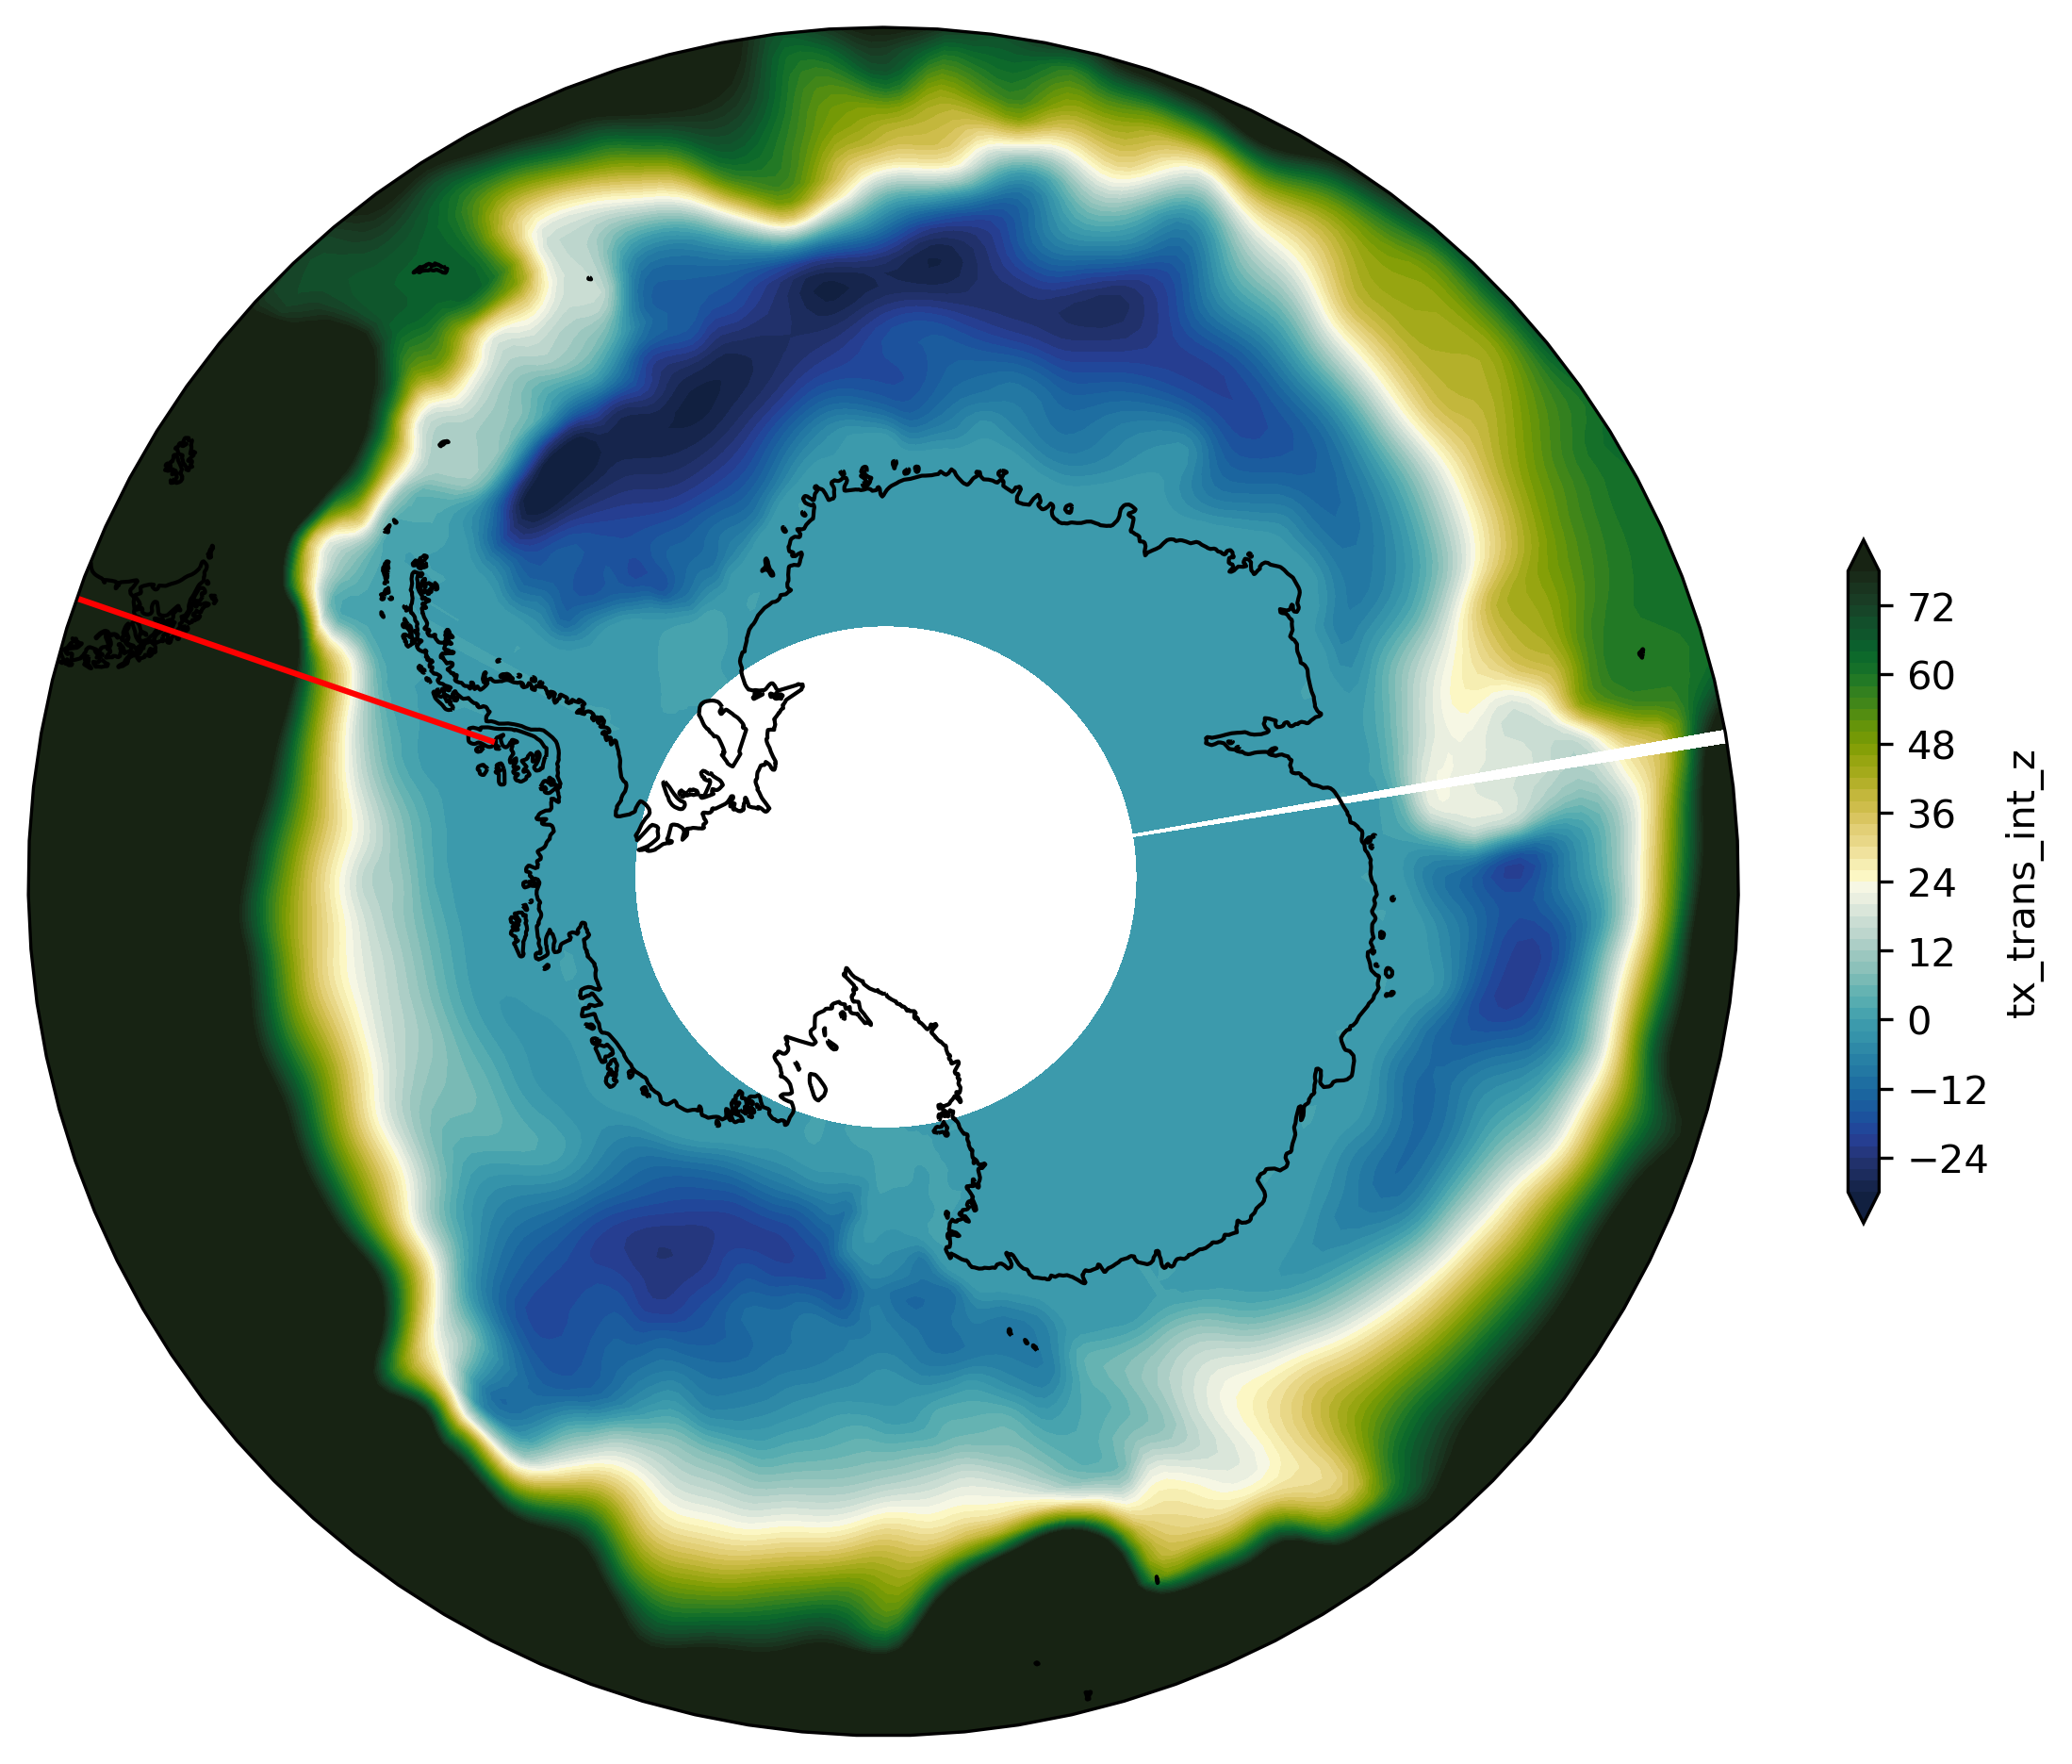

In [41]:
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(10, 8), dpi=300)
ax = plt.subplot(1,1,1, projection=projection)
flux1_mean.plot.contourf(ax=ax,levels=np.arange(-30,80,2),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.delta,cbar_kwargs={'shrink': 0.4})

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

ax.coastlines(resolution='50m')
ax.plot([-71,-71],[-70,-50],color='r',transform=ccrs.PlateCarree())
ax.set_extent([-280, 80, -82, -50], crs=ccrs.PlateCarree())

